# Imports

I'm setting matplotlib to draw nice js widgets, and setting my system to look at the 'procgen-tools' lib that I'm editing, rather than the system version.

In [23]:
%matplotlib widget

In [24]:
# this allows editing of imported modules without restarting kernel
%load_ext autoreload
%autoreload 2

In [25]:
import sys
sys.path.insert(0,"/home/trist/progging/MIRL/procgen-tools")

In [18]:
import matplotlib.pyplot as plt

In [26]:
import numpy as np

In [27]:
from pixcluscol import InteractivePixCol

In [28]:
from scipy.cluster import hierarchy

# Layers

In [75]:
#========================================================================================================
#==----- List of Activations, -------- Layer Names, ---- and ------ File Names. -----====================
#========================================================================================================
#   torch.Size([1, 64, 64, 64]) <-- block1.conv              - block1.conv._1af_4096dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.maxpool           - block1.maxpool._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.relu1        - block1.res1.relu1._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.conv1        - block1.res1.conv1._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.relu2        - block1.res1.relu2._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.conv2        - block1.res1.conv2._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.resadd       - block1.res1.resadd._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.relu1        - block1.res2.relu1._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.conv1        - block1.res2.conv1._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.relu2        - block1.res2.relu2._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.conv2        - block1.res2.conv2._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.resadd       - block1.res2.resadd._1af_1024dp_64dim_.bin
#  torch.Size([1, 128, 32, 32]) <-- block2.conv              - block2.conv._1af_1024dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.maxpool           - block2.maxpool._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.relu1        - block2.res1.relu1._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.conv1        - block2.res1.conv1._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.relu2        - block2.res1.relu2._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.conv2        - block2.res1.conv2._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.resadd       - block2.res1.resadd._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.relu1        - block2.res2.relu1._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.conv1        - block2.res2.conv1._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.relu2        - block2.res2.relu2._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.conv2        - block2.res2.conv2._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.resadd       - block2.res2.resadd._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block3.conv              - block3.conv._1af_256dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.maxpool           - block3.maxpool._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.relu1        - block3.res1.relu1._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.conv1        - block3.res1.conv1._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.relu2        - block3.res1.relu2._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.conv2        - block3.res1.conv2._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.resadd       - block3.res1.resadd._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.relu1        - block3.res2.relu1._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.conv1        - block3.res2.conv1._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.relu2        - block3.res2.relu2._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.conv2        - block3.res2.conv2._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.resadd       - block3.res2.resadd._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- relu3                    - relu3._1af_64dp_128dim_.bin
#         torch.Size([1, 8192]) <-- flatten                  - flatten._1af_1dp_8192dim_.bin
#          torch.Size([1, 256]) <-- fc                       - fc._1af_1dp_256dim_.bin
#          torch.Size([1, 256]) <-- relufc                   - relufc._1af_1dp_256dim_.bin


In [9]:
dirname = "activations_2024-07-30T01:05:48.898678"

## block1.conv

In [126]:
activ_img = (np.fromfile(dirname+"/block1.conv._1af_4096dp_64dim_.bin", dtype=np.float32)
            .reshape((64,64,64))
            .transpose((2,0,1))
            )

### Clustering

#### Hierarchal Linking

In [127]:
pixels = activ_img.reshape((64,-1))

In [128]:
pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    )

In [129]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

(-0.02, 0.6)

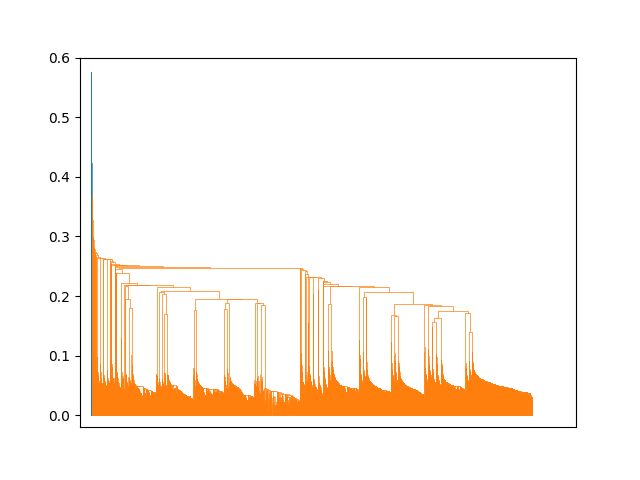

In [130]:
fig, ax = plt.subplots()
acf = ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=ax,
           )

ax.set_xlim([-1000,45000])
ax.set_ylim([-0.02,0.6])

#### Classify by Hierarchy

In [131]:
classif = hierarchy.fcluster(
    pix_link,
    0.2,
    criterion='distance',
    depth=2,
    )

In [132]:
classif.min(), classif.max()

(1, 73)

### Interactive Pixel Cluster Labeling

In [133]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)
pixCol = InteractivePixCol(  classif.reshape((64,64))  )

In [134]:
# Previous classifications can be printed out and loaded from text.
# This is somewhat strange, but allows for easily going back and forth
# between this tool and NDSP.

pixCol.loadClassif(

[[[186, 76, 254], [181, 76, 254], [186, 76, 254], [181, 76, 253], [167, 75, 251], [172, 75, 253], [176, 75, 251], [171, 75, 250], [183, 75, 250], [247, 82, 74], [238, 83, 71], [138, 71, 237], [241, 80, 72], [243, 81, 73], [176, 75, 253], [197, 75, 252], [185, 75, 253], [247, 74, 151], [186, 76, 254], [188, 75, 251], [255, 80, 76], [254, 76, 185], [208, 137, 62], [244, 85, 73], [253, 76, 175], [58, 180, 54], [64, 216, 148], [75, 119, 250], [67, 110, 224], [193, 75, 253], [254, 76, 139], [196, 75, 251], [181, 74, 248], [81, 44, 147], [254, 80, 76], [159, 73, 245], [250, 83, 75], [120, 47, 157], [175, 71, 239], [131, 56, 187], [156, 62, 208], [125, 42, 140], [182, 219, 65], [253, 84, 75], [110, 72, 33], [98, 253, 75], [172, 72, 241], [243, 236, 73], [251, 191, 75], [250, 202, 75], [251, 220, 75], [163, 68, 229], [73, 219, 244], [249, 76, 254], [75, 186, 252], [253, 237, 75], [72, 119, 242], [251, 203, 75], [66, 141, 221], [69, 99, 233], [253, 196, 75], [253, 205, 76], [244, 185, 73], [244, 193, 73], [251, 186, 75], [76, 149, 254], [69, 216, 231], [66, 181, 221], [66, 198, 220], [74, 137, 247], [73, 191, 244], [69, 145, 233], [69, 179, 233]], ["edge n wall ww", "edge w wall n", "edge n wall e", "edge n wall w", "edge w wall sss", "edge w wall ss", "edge n wall ee", "edge s wall w", "edge s wall ee", "oc nw", "ic se", "edge s wall e", "ic swe", "ic nwse", "edge w wall nn", "edge s wall ww", "edge e wall s", "oc swe", "edge w wall s", "edge e wall ?s", "oc se", "ic nese", "inner wall", "ic nw", "ic ne", "wall s", "wall e", "mouse nnww", "mouse ssww", "edge e wall n", "oc nes", "edge e wall ss", "edge s wall eee", "edge w", "ic nes", "edge e wall nn", "oc ne", "edge s", "edge sw", "edge n", "edge ne", "edge e", "wall w", "oc sw", "floor", "wall n", "edge se", "cheese ww", "cheese nee", "cheese see", "cheese ee", "edge nw", "mouse nee", "edge n wall ?", "mouse nne", "cheese nww", "mouse nww", "cheese e", "mouse ssw", "mouse sww", "cheese ne", "cheese nw", "cheese sw", "cheese w", "cheese se", "mouse nnw", "mouse see", "mouse sse", "mouse ssee", "mouse nw", "mouse ne", "mouse sw", "mouse se"], [51, 39, 39, 39, 39, 39, 39, 0, 3, 2, 6, 39, 39, 39, 39, 39, 39, 0, 3, 53, 2, 6, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 0, 3, 2, 6, 39, 39, 39, 39, 39, 39, 0, 3, 2, 6, 39, 40, 33, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 44, 45, 45, 45, 45, 10, 22, 26, 12, 45, 45, 45, 36, 44, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 42, 22, 26, 44, 44, 44, 45, 45, 45, 45, 10, 22, 26, 44, 44, 41, 33, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 26, 44, 44, 42, 9, 22, 22, 22, 22, 22, 26, 44, 44, 41, 33, 44, 42, 22, 23, 25, 25, 24, 22, 23, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 44, 43, 17, 20, 44, 44, 43, 17, 25, 25, 25, 25, 25, 20, 44, 44, 41, 33, 44, 42, 22, 26, 13, 44, 34, 21, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 55, 61, 60, 48, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 47, 63, 57, 50, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 45, 36, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 45, 45, 36, 44, 44, 45, 45, 36, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 62, 64, 49, 44, 44, 45, 36, 44, 44, 44, 45, 36, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 9, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 30, 44, 42, 9, 22, 30, 44, 42, 9, 22, 30, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 30, 44, 44, 42, 9, 30, 44, 44, 41, 33, 44, 43, 17, 20, 44, 44, 43, 17, 20, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 23, 25, 25, 25, 25, 20, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 14, 45, 45, 45, 36, 44, 44, 44, 45, 45, 45, 45, 10, 22, 26, 12, 45, 10, 22, 22, 26, 12, 45, 45, 45, 45, 45, 10, 22, 22, 26, 12, 10, 22, 22, 26, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 10, 22, 26, 12, 45, 10, 22, 26, 44, 44, 42, 22, 26, 12, 45, 35, 1, 22, 22, 22, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 29, 5, 25, 24, 22, 26, 44, 44, 42, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 23, 25, 24, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 16, 4, 44, 34, 21, 26, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 34, 21, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 31, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 12, 45, 10, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 44, 44, 45, 45, 36, 44, 44, 45, 45, 45, 45, 10, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 45, 36, 44, 44, 44, 45, 36, 44, 44, 44, 45, 36, 44, 44, 41, 33, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 26, 44, 42, 9, 22, 30, 44, 42, 9, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 9, 30, 44, 44, 42, 9, 30, 44, 44, 42, 9, 30, 44, 44, 41, 33, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 23, 25, 25, 25, 25, 25, 25, 25, 24, 22, 23, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 25, 25, 24, 22, 22, 26, 44, 43, 17, 25, 20, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 34, 21, 26, 13, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 44, 45, 45, 45, 45, 10, 22, 26, 12, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 10, 22, 22, 26, 12, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 10, 22, 26, 12, 45, 10, 22, 26, 12, 45, 10, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 41, 33, 44, 43, 17, 20, 44, 44, 43, 17, 25, 25, 25, 24, 22, 23, 25, 25, 25, 25, 25, 20, 44, 43, 17, 25, 25, 25, 25, 25, 25, 25, 25, 24, 22, 22, 26, 44, 42, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 22, 26, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 41, 14, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 42, 22, 26, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 45, 45, 36, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 45, 45, 36, 44, 44, 44, 45, 45, 45, 45, 45, 45, 36, 44, 44, 42, 22, 26, 12, 45, 35, 1, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 26, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 30, 44, 42, 9, 22, 30, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 9, 22, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 22, 22, 22, 29, 18, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 19, 5, 25, 25, 25, 25, 25, 25, 24, 22, 26, 44, 44, 43, 17, 20, 44, 44, 43, 17, 25, 25, 25, 24, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 20, 44, 43, 17, 25, 20, 44, 42, 22, 22, 26, 44, 44, 42, 22, 23, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 16, 4, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 31, 14, 45, 45, 45, 36, 44, 44, 42, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 10, 22, 22, 26, 44, 44, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 12, 45, 45, 45, 36, 44, 44, 44, 45, 45, 45, 45, 35, 1, 22, 22, 22, 30, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 9, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 22, 22, 22, 29, 18, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 19, 5, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 23, 25, 25, 25, 25, 20, 44, 42, 22, 22, 23, 25, 24, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 23, 25, 25, 25, 25, 20, 44, 44, 42, 22, 23, 25, 25, 16, 4, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 34, 21, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 42, 22, 26, 13, 44, 31, 14, 45, 45, 45, 36, 44, 44, 44, 45, 36, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 36, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 12, 10, 22, 22, 26, 12, 45, 10, 22, 26, 44, 44, 44, 45, 36, 44, 44, 42, 22, 26, 44, 44, 41, 1, 22, 22, 22, 30, 44, 44, 42, 9, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 9, 30, 44, 44, 42, 22, 26, 44, 44, 41, 18, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 5, 25, 24, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 23, 25, 25, 24, 22, 22, 26, 44, 42, 22, 22, 23, 25, 24, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 25, 25, 24, 22, 22, 23, 25, 25, 24, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 4, 44, 34, 21, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 13, 44, 34, 21, 22, 26, 44, 42, 22, 22, 26, 13, 34, 21, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 13, 44, 34, 21, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 12, 45, 10, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 26, 12, 10, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 12, 45, 45, 45, 36, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 12, 45, 10, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 23, 25, 25, 24, 22, 26, 44, 44, 43, 17, 20, 44, 44, 42, 22, 22, 23, 25, 24, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 26, 44, 44, 43, 17, 25, 25, 25, 24, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 13, 44, 34, 21, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 34, 21, 22, 26, 44, 42, 22, 22, 27, 65, 54, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 56, 69, 70, 52, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 12, 45, 45, 45, 36, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 59, 71, 72, 66, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 36, 44, 44, 42, 22, 26, 12, 45, 10, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 28, 58, 67, 68, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 41, 33, 44, 43, 17, 20, 44, 44, 43, 17, 25, 25, 25, 24, 22, 26, 44, 44, 42, 22, 22, 26, 44, 43, 17, 25, 20, 44, 43, 17, 25, 20, 44, 42, 22, 22, 23, 25, 25, 25, 25, 20, 44, 43, 17, 25, 25, 25, 25, 25, 25, 20, 44, 44, 42, 22, 23, 25, 25, 25, 25, 20, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 44, 45, 36, 44, 44, 44, 45, 45, 45, 45, 10, 22, 26, 44, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 44, 45, 36, 44, 44, 42, 22, 26, 12, 45, 45, 45, 36, 44, 44, 41, 33, 44, 42, 9, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 30, 44, 44, 42, 22, 22, 22, 22, 22, 22, 30, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 23, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 24, 22, 22, 23, 25, 25, 25, 25, 20, 44, 43, 17, 25, 25, 25, 24, 22, 22, 23, 25, 25, 25, 25, 20, 44, 44, 42, 22, 26, 44, 44, 43, 17, 25, 25, 25, 25, 25, 20, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 13, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 12, 45, 45, 45, 36, 44, 44, 44, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 10, 22, 22, 26, 44, 44, 45, 45, 45, 45, 45, 10, 22, 26, 12, 45, 45, 45, 36, 44, 44, 44, 45, 45, 45, 45, 35, 33, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 22, 22, 22, 29, 33, 44, 42, 22, 26, 44, 44, 43, 17, 25, 25, 25, 25, 25, 20, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 16, 33, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 31, 33, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 38, 37, 15, 7, 8, 32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 15, 7, 11, 8, 32, 15, 7, 11, 8, 32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 15, 7, 11, 8, 32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 46]]

)

In [135]:
# This will print the above info unless you have made any changes.

# If you made changes and want to save them. Run this one first and save the output.
# Paste the output into the above call to loadClassif to restore it.

#pixCol.printClassif()

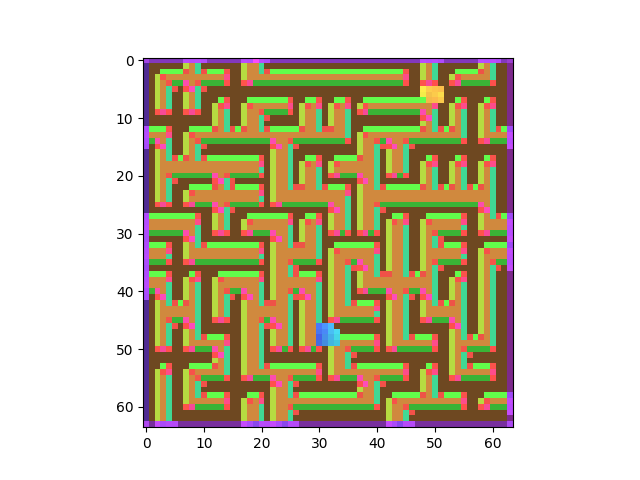

In [136]:
pixCol.drawPlot()

### View Distribution in NDSP

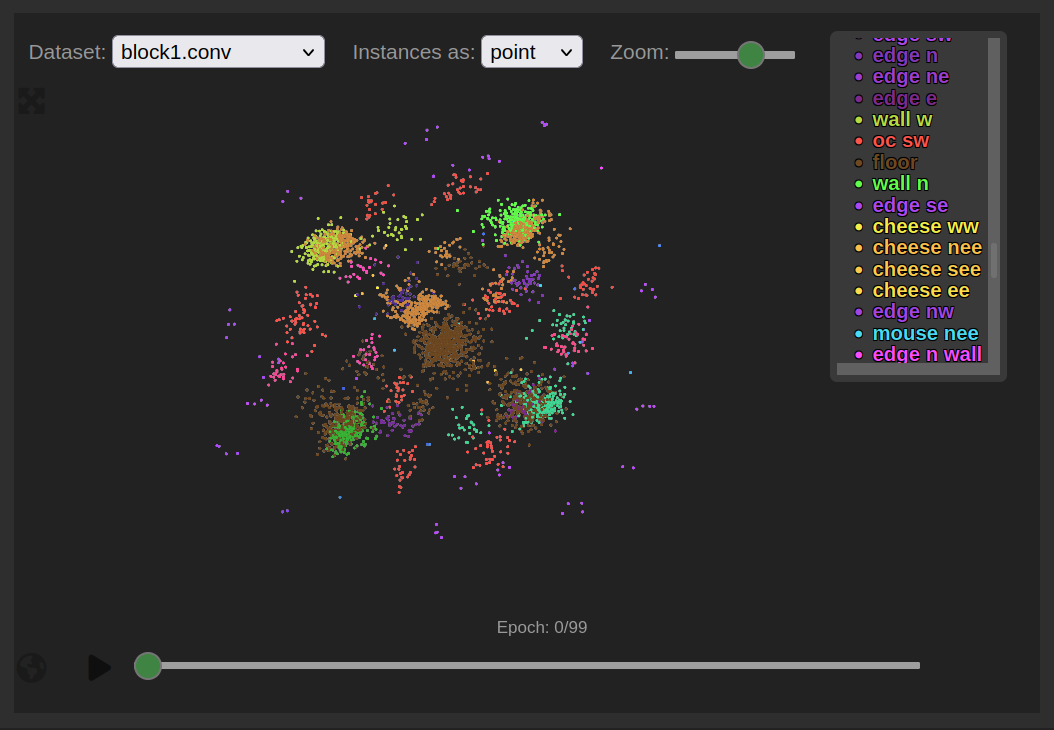

## block1.maxpool

In [157]:
num_channels = 64
pix_dim = 32

In [158]:
activ_img = (np.fromfile(dirname+"/block1.maxpool._1af_1024dp_64dim_.bin", dtype=np.float32)
            .reshape((num_channels, pix_dim, pix_dim))
            .transpose((2,0,1))
            )

### Clustering

#### Hierarchal Linking

In [159]:
pixels = activ_img.reshape((num_channels,-1))

In [160]:
pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    )

In [161]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

(-0.02, 0.4)

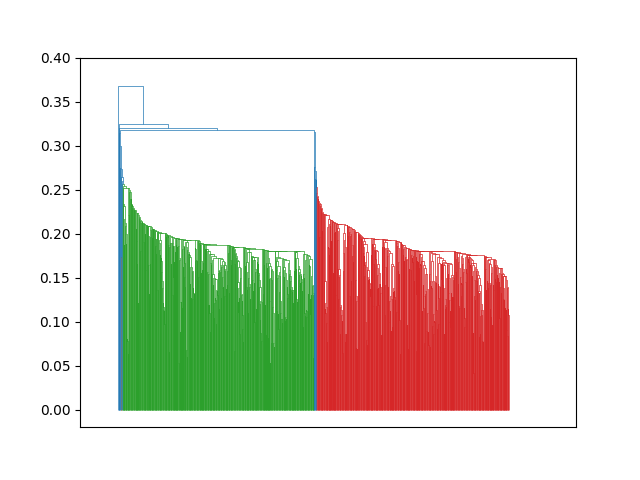

In [162]:
fig, ax = plt.subplots()
acf = ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=ax,
           )

ax.set_xlim([-1000,12000])
ax.set_ylim([-0.02,0.4])

#### Classify by Hierarchy

In [163]:
classif = hierarchy.fcluster(
    pix_link,
    0.18,
    criterion='distance',
    depth=2,
    )

In [164]:
classif.min(), classif.max()

(1, 348)

### Interactive Pixel Cluster Labeling

In [193]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)
pixCol = InteractivePixCol(  classif.reshape((pix_dim,pix_dim))  )

Previous layer for reference:
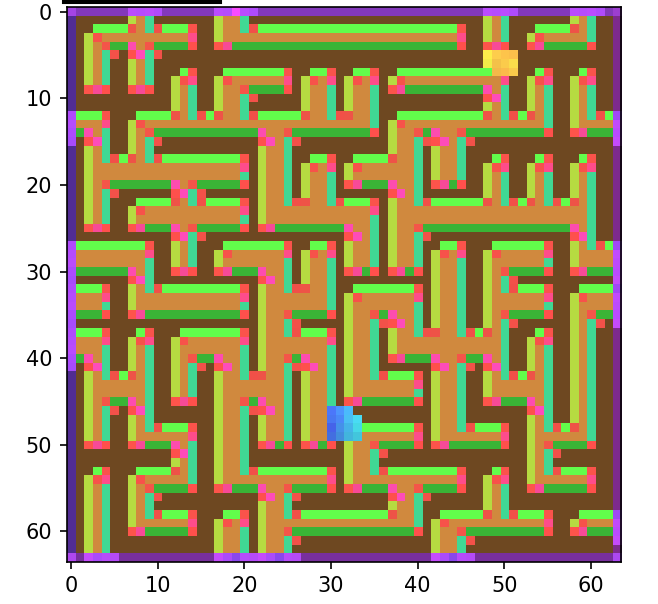

In [168]:
#############################################################################
#########                                                           #########
######        DO NOT RUN THE NEXT LINE ON FIRST RUN OF NEW LAYER       ######
#########                                                           #########
#############################################################################

In [199]:
# This classif was my first attempt. I noticed some patterns:
# green, brown -- pix that appear regularly in lines in the center
# light green -- 2 or 3 pix appear close together in lines in center
# dark purples --  pix regularly in lines along edges
# pink, red --  pix distances away from one another irregular positioning
# light yellow -- probably the cheese ?
# light blue -- possibly the mouse?
# dark yellow & blue -- could be cheese & mouse, but seems too far away.

pixCol.loadClassif(
[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [86, 33, 110], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [137, 41, 68], [0, 0, 0], [110, 33, 51], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [214, 64, 141], [247, 74, 127], [34, 37, 115], [236, 70, 132], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [173, 52, 94], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [203, 61, 138], [166, 49, 164], [111, 33, 49], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [104, 247, 74], [0, 0, 0], [75, 251, 164], [240, 72, 139], [0, 0, 0], [0, 0, 0], [247, 74, 139], [0, 0, 0], [0, 0, 0], [247, 74, 130], [0, 0, 0], [0, 0, 0], [240, 72, 158], [245, 73, 158], [0, 0, 0], [112, 39, 130], [0, 0, 0], [236, 70, 132], [0, 0, 0], [0, 0, 0], [242, 72, 160], [0, 0, 0], [71, 164, 238], [239, 71, 162], [120, 42, 142], [0, 0, 0], [0, 0, 0], [236, 70, 101], [0, 0, 0], [237, 71, 145], [109, 32, 58], [215, 64, 142], [0, 0, 0], [0, 0, 0], [251, 75, 170], [0, 0, 0], [0, 0, 0], [246, 73, 150], [86, 206, 61], [0, 0, 0], [0, 0, 0], [0, 0, 0], [251, 75, 133], [245, 73, 174], [132, 215, 64], [106, 122, 36], [87, 209, 62], [0, 0, 0], [0, 0, 0], [34, 71, 114], [0, 0, 0], [0, 0, 0], [33, 40, 112], [0, 0, 0], [0, 0, 0], [203, 61, 104], [168, 55, 185], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [64, 144, 215], [233, 69, 138], [65, 214, 64], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [241, 72, 135], [253, 76, 205], [0, 0, 0], [0, 0, 0], [0, 0, 0], [245, 73, 125], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [35, 49, 119], [64, 141, 215], [0, 0, 0], [0, 0, 0], [253, 234, 76], [0, 0, 0], [0, 0, 0], [0, 0, 0], [35, 49, 116], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [73, 232, 244], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [35, 54, 119], [0, 0, 0], [33, 38, 112], [0, 0, 0], [36, 43, 120], [232, 149, 69], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [235, 163, 70], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [139, 43, 145], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [248, 99, 74], [0, 0, 0], [0, 0, 0], [55, 109, 186], [0, 0, 0], [118, 35, 51], [136, 48, 160], [237, 149, 71], [0, 0, 0], [0, 0, 0], [131, 39, 65], [110, 44, 147], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [114, 34, 58], [136, 40, 80], [0, 0, 0], [0, 0, 0], [182, 249, 74], [0, 0, 0], [250, 75, 103], [0, 0, 0], [0, 0, 0], [106, 133, 39], [253, 76, 113], [0, 0, 0], [0, 0, 0], [109, 32, 45], [0, 0, 0], [0, 0, 0], [217, 65, 136], [130, 39, 68], [125, 37, 101], [0, 0, 0], [125, 50, 167], [0, 0, 0], [0, 0, 0], [0, 0, 0], [172, 252, 75], [0, 0, 0], [247, 74, 135], [159, 233, 70], [0, 0, 0], [0, 0, 0], [0, 0, 0], [226, 67, 204], [244, 73, 149], [0, 0, 0], [0, 0, 0], [247, 74, 147], [75, 251, 111], [245, 73, 170], [0, 0, 0], [244, 73, 129], [0, 0, 0], [218, 65, 97], [0, 0, 0], [242, 72, 168], [111, 139, 41], [241, 72, 159], [248, 74, 159], [248, 98, 74], [241, 72, 210], [0, 0, 0], [243, 73, 136], [196, 58, 126], [128, 93, 38], [215, 64, 135], [120, 125, 37], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [35, 37, 119], [34, 33, 111], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [60, 139, 203], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], ["_1", "_2", "_3", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "_31", "_32", "_33", "_34", "_35", "_36", "_37", "_38", "_39", "_40", "_41", "_42", "_43", "_44", "_45", "_46", "_47", "_48", "_49", "_50", "_51", "_52", "_53", "_54", "_55", "_56", "_57", "_58", "_59", "_60", "_61", "_62", "_63", "_64", "_65", "_66", "_67", "_68", "_69", "_70", "_71", "_72", "_73", "_74", "_75", "_76", "_77", "_78", "_79", "_80", "_81", "_82", "_83", "_84", "_85", "_86", "_87", "_88", "_89", "_90", "_91", "_92", "_93", "_94", "_95", "_96", "_97", "_98", "_99", "_100", "_101", "_102", "_103", "_104", "_105", "_106", "_107", "_108", "_109", "_110", "_111", "_112", "_113", "_114", "_115", "_116", "_117", "_118", "_119", "_120", "_121", "_122", "_123", "_124", "_125", "_126", "_127", "_128", "_129", "_130", "_131", "_132", "_133", "_134", "_135", "_136", "_137", "_138", "_139", "_140", "_141", "_142", "_143", "_144", "_145", "_146", "_147", "_148", "_149", "_150", "_151", "_152", "_153", "_154", "_155", "_156", "_157", "_158", "_159", "_160", "_161", "_162", "_163", "_164", "_165", "_166", "_167", "_168", "_169", "_170", "_171", "_172", "_173", "_174", "_175", "_176", "_177", "_178", "_179", "_180", "_181", "_182", "_183", "_184", "_185", "_186", "_187", "_188", "_189", "_190", "_191", "_192", "_193", "_194", "_195", "_196", "_197", "_198", "_199", "_200", "_201", "_202", "_203", "_204", "_205", "_206", "_207", "_208", "_209", "_210", "_211", "_212", "_213", "_214", "_215", "_216", "_217", "_218", "_219", "_220", "_221", "_222", "_223", "_224", "_225", "_226", "_227", "_228", "_229", "_230", "_231", "_232", "_233", "_234", "_235", "_236", "_237", "_238", "_239", "_240", "_241", "_242", "_243", "_244", "_245", "_246", "_247", "_248", "_249", "_250", "_251", "_252", "_253", "_254", "_255", "_256", "_257", "_258", "_259", "_260", "_261", "_262", "_263", "_264", "_265", "_266", "_267", "_268", "_269", "_270", "_271", "_272", "_273", "_274", "_275", "_276", "_277", "_278", "_279", "_280", "_281", "_282", "_283", "_284", "_285", "_286", "_287", "_288", "_289", "_290", "_291", "_292", "_293", "_294", "_295", "_296", "_297", "_298", "_299", "_300", "_301", "_302", "_303", "_304", "_305", "_306", "_307", "_308", "_309", "_310", "_311", "_312", "_313", "_314", "_315", "_316", "_317", "_318", "_319", "_320", "_321", "_322", "_323", "_324", "_325", "_326", "_327", "_328", "_329", "_330", "_331", "_332", "_333", "_334", "_335", "_336", "_337", "_338", "_339", "_340", "_341", "_342", "_343", "_344", "_345", "_346", "_347", "_348"], [197, 8, 212, 38, 212, 38, 312, 184, 310, 144, 322, 175, 212, 38, 212, 38, 321, 176, 235, 12, 328, 179, 213, 168, 211, 39, 215, 40, 323, 39, 212, 37, 212, 38, 212, 38, 212, 38, 212, 38, 212, 38, 214, 41, 211, 39, 212, 37, 274, 81, 191, 10, 333, 16, 212, 38, 212, 38, 235, 13, 192, 11, 332, 16, 198, 0, 274, 87, 274, 87, 262, 90, 274, 89, 274, 90, 274, 90, 274, 90, 319, 121, 279, 71, 275, 86, 274, 138, 274, 90, 274, 90, 274, 90, 274, 90, 274, 161, 274, 90, 274, 90, 274, 90, 274, 90, 274, 90, 274, 90, 274, 100, 274, 88, 274, 53, 267, 90, 274, 87, 274, 90, 274, 55, 274, 53, 193, 188, 196, 5, 274, 125, 255, 19, 303, 141, 299, 171, 305, 143, 254, 82, 338, 170, 200, 164, 274, 50, 253, 82, 272, 82, 274, 82, 254, 82, 254, 82, 253, 82, 272, 82, 274, 82, 274, 82, 274, 82, 252, 131, 272, 82, 274, 82, 220, 112, 289, 116, 274, 76, 201, 165, 326, 167, 256, 82, 274, 88, 274, 77, 194, 133, 196, 0, 265, 71, 270, 65, 274, 25, 274, 180, 269, 100, 232, 107, 233, 109, 249, 123, 249, 107, 249, 107, 231, 107, 231, 107, 248, 107, 249, 107, 249, 107, 231, 107, 231, 107, 231, 107, 231, 107, 248, 107, 234, 107, 231, 107, 248, 107, 337, 182, 340, 169, 324, 26, 232, 142, 269, 100, 231, 107, 231, 107, 195, 100, 199, 4, 274, 62, 274, 89, 274, 89, 274, 89, 274, 100, 274, 81, 274, 89, 274, 89, 261, 124, 274, 90, 290, 94, 297, 90, 236, 89, 261, 124, 274, 99, 274, 89, 274, 67, 274, 85, 274, 24, 274, 82, 274, 82, 274, 104, 274, 82, 274, 173, 330, 156, 274, 89, 274, 67, 274, 100, 274, 81, 274, 89, 195, 100, 218, 4, 274, 63, 298, 28, 202, 27, 274, 89, 274, 100, 274, 88, 274, 89, 274, 89, 228, 61, 274, 117, 264, 29, 274, 72, 237, 152, 228, 61, 274, 100, 274, 89, 274, 89, 325, 158, 274, 50, 304, 49, 274, 49, 274, 72, 276, 153, 274, 47, 274, 98, 203, 27, 274, 89, 274, 100, 274, 88, 274, 89, 195, 100, 216, 1, 274, 90, 274, 118, 267, 119, 274, 91, 274, 90, 274, 88, 274, 89, 274, 89, 228, 88, 274, 90, 274, 90, 274, 90, 262, 90, 228, 88, 274, 99, 274, 89, 274, 89, 267, 90, 274, 87, 274, 90, 274, 90, 274, 90, 274, 90, 274, 88, 274, 54, 318, 90, 283, 89, 274, 100, 274, 88, 274, 89, 335, 162, 239, 9, 274, 88, 274, 92, 274, 89, 274, 126, 266, 129, 276, 82, 276, 82, 272, 82, 274, 88, 276, 130, 274, 82, 274, 89, 263, 107, 274, 88, 343, 185, 341, 186, 307, 183, 245, 59, 274, 145, 276, 82, 274, 151, 274, 89, 266, 129, 276, 82, 276, 82, 274, 82, 274, 139, 274, 100, 274, 88, 274, 110, 207, 132, 219, 6, 274, 88, 274, 89, 274, 89, 274, 89, 288, 107, 249, 107, 249, 107, 231, 107, 231, 107, 248, 157, 281, 35, 274, 89, 263, 107, 231, 107, 345, 187, 344, 347, 339, 190, 311, 107, 265, 71, 269, 155, 274, 36, 274, 89, 274, 107, 249, 107, 249, 107, 231, 107, 231, 107, 251, 107, 232, 113, 231, 107, 195, 100, 217, 3, 274, 88, 274, 89, 274, 89, 274, 89, 274, 90, 274, 90, 274, 90, 274, 90, 274, 90, 274, 99, 274, 89, 274, 89, 274, 85, 274, 24, 327, 181, 334, 346, 301, 189, 300, 90, 287, 69, 276, 103, 274, 89, 274, 89, 274, 90, 274, 125, 238, 17, 274, 89, 274, 67, 274, 90, 274, 125, 238, 18, 195, 100, 217, 3, 274, 57, 260, 115, 247, 20, 246, 46, 246, 46, 274, 47, 274, 93, 263, 21, 274, 88, 221, 128, 309, 140, 259, 89, 259, 75, 295, 57, 257, 73, 273, 149, 274, 107, 293, 166, 277, 48, 257, 73, 258, 51, 258, 52, 241, 163, 274, 57, 259, 75, 274, 89, 274, 89, 306, 100, 274, 57, 259, 75, 195, 100, 217, 3, 274, 56, 274, 30, 274, 25, 232, 120, 226, 44, 317, 44, 274, 105, 209, 134, 285, 107, 315, 45, 206, 42, 271, 78, 227, 90, 274, 71, 275, 86, 210, 136, 284, 107, 206, 43, 265, 127, 308, 90, 226, 90, 226, 44, 274, 148, 274, 55, 274, 31, 274, 89, 274, 89, 278, 90, 274, 71, 268, 64, 195, 100, 217, 3, 274, 88, 274, 89, 274, 89, 274, 67, 276, 82, 276, 82, 276, 82, 276, 82, 276, 82, 320, 97, 273, 32, 274, 89, 276, 82, 276, 82, 276, 82, 276, 82, 229, 82, 274, 33, 228, 61, 276, 83, 276, 82, 276, 82, 276, 82, 274, 135, 286, 96, 276, 82, 276, 82, 276, 82, 276, 82, 276, 79, 195, 100, 216, 2, 274, 88, 274, 108, 274, 89, 274, 107, 250, 107, 265, 106, 270, 66, 291, 25, 249, 107, 294, 111, 282, 137, 274, 107, 249, 107, 249, 107, 249, 107, 265, 106, 270, 78, 314, 150, 228, 88, 274, 100, 316, 177, 249, 107, 249, 107, 232, 114, 292, 122, 249, 107, 249, 107, 269, 100, 265, 106, 296, 78, 336, 174, 216, 1, 274, 90, 274, 90, 274, 90, 230, 95, 274, 90, 274, 58, 268, 64, 274, 89, 274, 147, 274, 90, 274, 90, 274, 90, 280, 146, 274, 125, 274, 90, 274, 84, 274, 70, 274, 84, 274, 59, 276, 80, 274, 178, 274, 159, 274, 90, 274, 125, 274, 125, 274, 90, 274, 90, 274, 100, 274, 56, 274, 160, 342, 154, 239, 7, 225, 22, 223, 14, 313, 172, 243, 59, 240, 68, 242, 59, 242, 59, 204, 34, 329, 23, 224, 15, 223, 14, 222, 74, 331, 102, 244, 59, 240, 68, 242, 59, 242, 59, 242, 59, 242, 59, 242, 59, 205, 32, 222, 74, 302, 101, 242, 59, 242, 59, 242, 59, 242, 59, 240, 59, 242, 59, 242, 59, 208, 60]]
)

In [200]:
# here I've put the classification into NDSP then selected all the pink and red pix.
# I tried to put them into just a few new classis based on some rough linear
# separability I saw.

#pixCol.loadClassif(
#([[0,0,0],[0,0,0],[0,0,0],[86,33,110],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[137,41,68],[0,0,0],[110,33,51],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[214,64,141],[247,74,127],[34,37,115],[236,70,132],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[173,52,94],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[203,61,138],[166,49,164],[111,33,49],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[104,247,74],[0,0,0],[75,251,164],[240,72,139],[0,0,0],[0,0,0],[247,74,139],[0,0,0],[0,0,0],[247,74,130],[0,0,0],[0,0,0],[240,72,158],[245,73,158],[0,0,0],[112,39,130],[0,0,0],[236,70,132],[0,0,0],[0,0,0],[242,72,160],[0,0,0],[71,164,238],[239,71,162],[120,42,142],[0,0,0],[0,0,0],[236,70,101],[0,0,0],[237,71,145],[109,32,58],[215,64,142],[0,0,0],[0,0,0],[251,75,170],[0,0,0],[0,0,0],[246,73,150],[86,206,61],[0,0,0],[0,0,0],[0,0,0],[251,75,133],[245,73,174],[132,215,64],[106,122,36],[87,209,62],[0,0,0],[0,0,0],[34,71,114],[0,0,0],[0,0,0],[33,40,112],[0,0,0],[0,0,0],[203,61,104],[168,55,185],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[64,144,215],[233,69,138],[65,214,64],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[241,72,135],[253,76,205],[0,0,0],[0,0,0],[0,0,0],[245,73,125],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[35,49,119],[64,141,215],[0,0,0],[0,0,0],[253,234,76],[0,0,0],[0,0,0],[0,0,0],[35,49,116],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[73,232,244],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[35,54,119],[0,0,0],[33,38,112],[0,0,0],[36,43,120],[232,149,69],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[235,163,70],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[139,43,145],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[248,99,74],[0,0,0],[0,0,0],[55,109,186],[0,0,0],[118,35,51],[136,48,160],[237,149,71],[0,0,0],[0,0,0],[131,39,65],[110,44,147],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[114,34,58],[136,40,80],[0,0,0],[0,0,0],[182,249,74],[0,0,0],[250,75,103],[0,0,0],[0,0,0],[106,133,39],[253,76,113],[0,0,0],[0,0,0],[109,32,45],[0,0,0],[0,0,0],[217,65,136],[130,39,68],[125,37,101],[0,0,0],[125,50,167],[0,0,0],[0,0,0],[0,0,0],[172,252,75],[0,0,0],[247,74,135],[159,233,70],[0,0,0],[0,0,0],[0,0,0],[226,67,204],[244,73,149],[0,0,0],[0,0,0],[247,74,147],[75,251,111],[245,73,170],[0,0,0],[244,73,129],[0,0,0],[218,65,97],[0,0,0],[242,72,168],[111,139,41],[241,72,159],[248,74,159],[248,98,74],[241,72,210],[0,0,0],[243,73,136],[196,58,126],[128,93,38],[215,64,135],[120,125,37],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[35,37,119],[34,33,111],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[60,139,203],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[193,120,249],[182,204,249],[133,252,210],[186,253,231]], ["_1","_2","_3","_4","_5","_6","_7","_8","_9","_10","_11","_12","_13","_14","_15","_16","_17","_18","_19","_20","_21","_22","_23","_24","_25","_26","_27","_28","_29","_30","_31","_32","_33","_34","_35","_36","_37","_38","_39","_40","_41","_42","_43","_44","_45","_46","_47","_48","_49","_50","_51","_52","_53","_54","_55","_56","_57","_58","_59","_60","_61","_62","_63","_64","_65","_66","_67","_68","_69","_70","_71","_72","_73","_74","_75","_76","_77","_78","_79","_80","_81","_82","_83","_84","_85","_86","_87","_88","_89","_90","_91","_92","_93","_94","_95","_96","_97","_98","_99","_100","_101","_102","_103","_104","_105","_106","_107","_108","_109","_110","_111","_112","_113","_114","_115","_116","_117","_118","_119","_120","_121","_122","_123","_124","_125","_126","_127","_128","_129","_130","_131","_132","_133","_134","_135","_136","_137","_138","_139","_140","_141","_142","_143","_144","_145","_146","_147","_148","_149","_150","_151","_152","_153","_154","_155","_156","_157","_158","_159","_160","_161","_162","_163","_164","_165","_166","_167","_168","_169","_170","_171","_172","_173","_174","_175","_176","_177","_178","_179","_180","_181","_182","_183","_184","_185","_186","_187","_188","_189","_190","_191","_192","_193","_194","_195","_196","_197","_198","_199","_200","_201","_202","_203","_204","_205","_206","_207","_208","_209","_210","_211","_212","_213","_214","_215","_216","_217","_218","_219","_220","_221","_222","_223","_224","_225","_226","_227","_228","_229","_230","_231","_232","_233","_234","_235","_236","_237","_238","_239","_240","_241","_242","_243","_244","_245","_246","_247","_248","_249","_250","_251","_252","_253","_254","_255","_256","_257","_258","_259","_260","_261","_262","_263","_264","_265","_266","_267","_268","_269","_270","_271","_272","_273","_274","_275","_276","_277","_278","_279","_280","_281","_282","_283","_284","_285","_286","_287","_288","_289","_290","_291","_292","_293","_294","_295","_296","_297","_298","_299","_300","_301","_302","_303","_304","_305","_306","_307","_308","_309","_310","_311","_312","_313","_314","_315","_316","_317","_318","_319","_320","_321","_322","_323","_324","_325","_326","_327","_328","_329","_330","_331","_332","_333","_334","_335","_336","_337","_338","_339","_340","_341","_342","_343","_344","_345","_346","_347","_348","class349","class350","class351","class352"], [197,8,212,38,212,38,312,184,310,144,322,175,212,38,212,38,321,176,235,12,328,179,213,168,211,39,215,40,323,39,212,348,212,38,212,38,212,38,212,38,212,38,214,41,211,39,212,350,274,350,191,10,333,16,212,38,212,38,235,13,192,11,332,16,198,0,274,351,274,351,262,90,274,89,274,90,274,90,274,90,319,121,279,351,275,351,274,138,274,90,274,90,274,90,274,90,274,161,274,90,274,90,274,90,274,90,274,90,274,90,274,100,274,88,274,349,349,90,274,349,274,90,274,55,274,349,193,188,196,5,274,351,255,19,303,141,299,171,305,143,350,82,338,170,200,164,274,349,350,82,350,82,274,82,351,82,348,82,350,82,272,82,274,82,274,82,274,82,252,131,272,82,274,82,220,112,289,116,274,76,201,165,326,167,256,82,274,88,274,77,194,133,196,0,350,71,349,65,274,350,274,180,350,100,350,107,233,109,249,123,249,107,249,107,231,107,231,107,350,107,249,107,249,107,231,107,231,107,231,107,231,107,351,107,234,107,231,107,351,107,337,182,340,169,324,26,351,142,351,100,231,107,231,107,195,100,199,4,274,62,274,89,274,89,274,89,274,100,274,350,274,89,274,89,349,351,274,90,290,94,297,90,236,89,261,349,274,348,274,89,274,350,274,85,274,350,274,82,274,82,274,104,274,82,274,173,330,156,274,89,274,348,274,100,274,350,274,89,195,100,218,4,274,63,298,28,202,351,274,89,274,100,274,88,274,89,274,89,351,351,274,117,264,29,274,72,237,152,348,351,274,100,274,89,274,89,325,158,274,350,304,49,274,49,274,72,276,153,274,349,274,98,203,350,274,89,274,100,274,88,274,89,195,100,216,1,274,90,274,118,351,119,274,91,274,90,274,88,274,89,274,89,351,88,274,90,274,90,274,90,262,90,351,88,274,348,274,89,274,89,349,90,274,351,274,90,274,90,274,90,274,90,274,88,274,54,318,90,283,89,274,100,274,88,274,89,335,162,239,9,274,88,274,92,274,89,274,126,266,350,276,82,276,82,351,82,274,88,276,130,274,82,274,89,350,107,274,88,343,185,341,186,307,183,245,59,274,145,276,82,274,151,274,89,266,129,276,82,276,82,274,82,274,139,274,100,274,88,274,110,207,132,219,6,274,88,274,89,274,89,274,89,288,107,249,107,249,107,231,107,231,107,350,157,281,35,274,89,350,107,231,107,345,187,344,347,339,190,311,107,351,351,351,155,274,36,274,89,274,107,249,107,249,107,231,107,231,107,251,107,351,113,231,107,195,100,217,3,274,88,274,89,274,89,274,89,274,90,274,90,274,90,274,90,274,90,274,351,274,89,274,89,274,85,274,351,327,181,334,346,301,189,300,90,287,69,276,103,274,89,274,89,274,90,274,351,351,17,274,89,274,350,274,90,274,350,348,18,195,100,217,3,274,351,260,115,247,20,246,46,246,46,274,351,274,93,351,21,274,88,221,128,309,140,351,89,351,351,295,351,351,348,273,149,274,107,293,166,277,48,351,351,258,51,258,52,241,163,274,351,350,349,274,89,274,89,306,100,274,351,348,351,195,100,217,3,274,351,274,30,274,351,351,120,226,44,317,44,274,105,209,134,285,107,315,45,206,42,271,351,227,90,274,351,275,348,210,136,284,107,206,43,351,127,308,90,226,90,226,44,274,148,274,55,274,31,274,89,274,89,278,90,274,351,348,351,195,100,217,3,274,88,274,89,274,89,274,351,276,82,276,82,276,82,276,82,276,82,320,97,273,350,274,89,276,82,276,82,276,82,276,82,229,82,274,33,351,351,276,83,276,82,276,82,276,82,274,135,286,96,276,82,276,82,276,82,276,82,276,79,195,100,216,2,274,88,274,108,274,89,274,107,250,107,349,349,349,66,291,351,249,107,294,111,282,137,274,107,249,107,249,107,249,107,265,349,350,351,314,150,350,88,274,100,316,177,249,107,249,107,351,114,292,122,249,107,249,107,349,100,351,351,296,350,336,174,216,1,274,90,274,90,274,90,230,95,274,90,274,58,351,351,274,89,274,147,274,90,274,90,274,90,280,146,274,351,274,90,274,84,274,70,274,84,274,59,276,80,274,178,274,159,274,90,274,350,274,351,274,90,274,90,274,100,274,350,274,160,342,154,239,7,225,22,223,14,313,172,243,59,240,68,242,59,242,59,204,34,329,23,224,15,223,14,222,74,331,102,244,59,240,68,242,59,242,59,242,59,242,59,242,59,205,351,222,74,302,101,242,59,242,59,242,59,242,59,240,59,242,59,242,59,208,60])
#)

In [201]:
# Tried working with the above classification. I'm thinking about things like
# would the network emphasize the floor path, or the two walls, or
# more likely 'motifs' such as "block with a corner above it and a horizontal hall below"
# which is much harder to see right away.
# I think closer cross reference of the previous image would help.

#pixCol.loadClassif(
#[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [86, 33, 110], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [137, 41, 68], [0, 0, 0], [110, 33, 51], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [214, 64, 141], [247, 74, 127], [34, 37, 115], [236, 70, 132], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [173, 52, 94], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [203, 61, 138], [166, 49, 164], [111, 33, 49], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [104, 247, 74], [0, 0, 0], [75, 251, 164], [240, 72, 139], [0, 0, 0], [0, 0, 0], [247, 74, 139], [0, 0, 0], [0, 0, 0], [247, 74, 130], [0, 0, 0], [65, 128, 218], [240, 72, 158], [245, 73, 158], [0, 0, 0], [112, 39, 130], [0, 0, 0], [236, 70, 132], [0, 0, 0], [0, 0, 0], [242, 72, 160], [0, 0, 0], [35, 36, 118], [239, 71, 162], [120, 42, 142], [0, 0, 0], [0, 0, 0], [236, 70, 101], [0, 0, 0], [237, 71, 145], [109, 32, 58], [215, 64, 142], [0, 0, 0], [0, 0, 0], [251, 75, 170], [0, 0, 0], [0, 0, 0], [246, 73, 150], [154, 116, 46], [0, 0, 0], [0, 0, 0], [0, 0, 0], [251, 75, 133], [245, 73, 174], [132, 215, 64], [133, 161, 48], [44, 133, 39], [0, 0, 0], [0, 0, 0], [76, 253, 203], [0, 0, 0], [0, 0, 0], [33, 40, 112], [0, 0, 0], [0, 0, 0], [203, 61, 104], [168, 55, 185], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [75, 163, 250], [233, 69, 138], [54, 180, 127], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [241, 72, 135], [253, 76, 205], [0, 0, 0], [0, 0, 0], [0, 0, 0], [69, 230, 162], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [35, 49, 119], [34, 39, 116], [0, 0, 0], [0, 0, 0], [253, 234, 76], [0, 0, 0], [0, 0, 0], [0, 0, 0], [35, 49, 116], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [77, 76, 254], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [76, 254, 187], [0, 0, 0], [33, 38, 112], [0, 0, 0], [36, 43, 120], [232, 149, 69], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [235, 163, 70], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [139, 43, 145], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [248, 99, 74], [0, 0, 0], [0, 0, 0], [75, 164, 250], [0, 0, 0], [118, 35, 51], [136, 48, 160], [237, 149, 71], [0, 0, 0], [0, 0, 0], [131, 39, 65], [110, 44, 147], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [114, 34, 58], [136, 40, 80], [0, 0, 0], [0, 0, 0], [182, 249, 74], [0, 0, 0], [250, 75, 103], [0, 0, 0], [0, 0, 0], [138, 177, 53], [253, 76, 113], [0, 0, 0], [0, 0, 0], [109, 32, 45], [0, 0, 0], [0, 0, 0], [217, 65, 136], [130, 39, 68], [125, 37, 101], [0, 0, 0], [125, 50, 167], [0, 0, 0], [0, 0, 0], [0, 0, 0], [172, 252, 75], [0, 0, 0], [247, 74, 135], [159, 238, 71], [0, 0, 0], [0, 0, 0], [0, 0, 0], [226, 67, 204], [244, 73, 149], [0, 0, 0], [0, 0, 0], [247, 74, 147], [75, 251, 111], [245, 73, 170], [0, 0, 0], [244, 73, 129], [0, 0, 0], [218, 65, 97], [0, 0, 0], [242, 72, 168], [111, 139, 41], [241, 72, 159], [248, 74, 159], [248, 98, 74], [241, 72, 210], [0, 0, 0], [243, 73, 136], [196, 58, 126], [162, 208, 62], [215, 64, 135], [53, 179, 91], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [35, 37, 119], [34, 33, 111], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [36, 37, 122], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [195, 129, 58], [59, 198, 159], [182, 111, 54], [162, 221, 66]], ["_1", "_2", "_3", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "_31", "_32", "_33", "_34", "_35", "_36", "_37", "_38", "_39", "_40", "_41", "_42", "_43", "_44", "_45", "_46", "_47", "_48", "_49", "_50", "_51", "_52", "_53", "_54", "_55", "_56", "_57", "_58", "_59", "_60", "_61", "_62", "_63", "_64", "_65", "_66", "_67", "_68", "_69", "_70", "_71", "_72", "_73", "_74", "_75", "_76", "_77", "_78", "_79", "_80", "_81", "_82", "_83", "_84", "_85", "_86", "_87", "_88", "_89", "_90", "_91", "_92", "_93", "_94", "_95", "_96", "_97", "_98", "_99", "_100", "_101", "_102", "_103", "_104", "_105", "_106", "_107", "_108", "_109", "_110", "_111", "_112", "_113", "_114", "_115", "_116", "_117", "_118", "_119", "_120", "_121", "_122", "_123", "_124", "_125", "_126", "_127", "_128", "_129", "_130", "_131", "_132", "_133", "_134", "_135", "_136", "_137", "_138", "_139", "_140", "_141", "_142", "_143", "_144", "_145", "_146", "_147", "_148", "_149", "_150", "_151", "_152", "_153", "_154", "_155", "_156", "_157", "_158", "_159", "_160", "_161", "_162", "_163", "_164", "_165", "_166", "_167", "_168", "_169", "_170", "_171", "_172", "_173", "_174", "_175", "_176", "_177", "_178", "_179", "_180", "_181", "_182", "_183", "_184", "_185", "_186", "_187", "_188", "_189", "_190", "_191", "_192", "_193", "_194", "_195", "_196", "_197", "_198", "_199", "_200", "_201", "_202", "_203", "_204", "_205", "_206", "_207", "_208", "_209", "_210", "_211", "_212", "_213", "_214", "_215", "_216", "_217", "_218", "_219", "_220", "_221", "_222", "_223", "_224", "_225", "_226", "_227", "_228", "_229", "_230", "_231", "_232", "_233", "_234", "_235", "_236", "_237", "_238", "_239", "_240", "_241", "_242", "_243", "_244", "_245", "_246", "_247", "_248", "_249", "_250", "_251", "_252", "_253", "_254", "_255", "_256", "_257", "_258", "_259", "_260", "_261", "_262", "_263", "_264", "_265", "_266", "_267", "_268", "_269", "_270", "_271", "_272", "_273", "_274", "_275", "_276", "_277", "_278", "_279", "_280", "_281", "_282", "_283", "_284", "_285", "_286", "_287", "_288", "_289", "_290", "_291", "_292", "_293", "_294", "_295", "_296", "_297", "_298", "_299", "_300", "_301", "_302", "_303", "_304", "_305", "_306", "_307", "_308", "_309", "_310", "_311", "_312", "_313", "_314", "_315", "_316", "_317", "_318", "_319", "_320", "_321", "_322", "_323", "_324", "_325", "_326", "_327", "_328", "_329", "_330", "_331", "_332", "_333", "_334", "_335", "_336", "_337", "_338", "_339", "_340", "_341", "_342", "_343", "_344", "_345", "_346", "_347", "_348", "class349", "class350", "class351", "class352"], [197, 8, 212, 38, 212, 38, 312, 184, 310, 144, 322, 175, 212, 38, 212, 38, 321, 176, 235, 12, 328, 179, 213, 168, 211, 39, 215, 40, 323, 39, 212, 348, 212, 38, 212, 38, 212, 38, 212, 38, 212, 38, 214, 41, 211, 39, 212, 350, 274, 350, 191, 10, 333, 16, 212, 38, 212, 38, 235, 13, 192, 11, 332, 16, 198, 0, 274, 351, 274, 351, 262, 90, 274, 89, 274, 90, 274, 90, 274, 90, 319, 121, 279, 351, 275, 351, 274, 138, 274, 90, 274, 90, 274, 90, 274, 90, 274, 161, 274, 90, 274, 90, 274, 90, 274, 90, 274, 90, 274, 90, 274, 100, 274, 88, 274, 349, 349, 90, 274, 349, 274, 90, 274, 55, 274, 349, 193, 188, 196, 5, 274, 351, 255, 19, 303, 141, 299, 171, 305, 143, 350, 82, 338, 170, 200, 164, 274, 349, 350, 82, 350, 82, 274, 82, 351, 82, 348, 82, 350, 82, 272, 82, 274, 82, 274, 82, 274, 82, 252, 131, 272, 82, 274, 82, 220, 112, 289, 116, 274, 76, 201, 165, 326, 167, 256, 82, 274, 88, 274, 77, 194, 133, 196, 0, 350, 71, 349, 65, 274, 350, 274, 180, 350, 100, 350, 107, 233, 109, 249, 123, 249, 107, 249, 107, 231, 107, 231, 107, 350, 107, 249, 107, 249, 107, 231, 107, 231, 107, 231, 107, 231, 107, 351, 107, 234, 107, 231, 107, 351, 107, 337, 182, 340, 169, 324, 26, 351, 142, 351, 100, 231, 107, 231, 107, 195, 100, 199, 4, 274, 62, 274, 89, 274, 89, 274, 89, 274, 100, 274, 350, 274, 89, 274, 89, 349, 351, 274, 90, 290, 94, 297, 90, 236, 89, 261, 349, 274, 348, 274, 89, 274, 350, 274, 85, 274, 350, 274, 82, 274, 82, 274, 104, 274, 82, 274, 173, 330, 156, 274, 89, 274, 348, 274, 100, 274, 350, 274, 89, 195, 100, 218, 4, 274, 63, 298, 28, 202, 351, 274, 89, 274, 100, 274, 88, 274, 89, 274, 89, 351, 351, 274, 117, 264, 29, 274, 72, 237, 152, 348, 351, 274, 100, 274, 89, 274, 89, 325, 158, 274, 350, 304, 49, 274, 49, 274, 72, 276, 153, 274, 349, 274, 98, 203, 350, 274, 89, 274, 100, 274, 88, 274, 89, 195, 100, 216, 1, 274, 90, 274, 118, 351, 119, 274, 91, 274, 90, 274, 88, 274, 89, 274, 89, 351, 88, 274, 90, 274, 90, 274, 90, 262, 90, 351, 88, 274, 348, 274, 89, 274, 89, 349, 90, 274, 351, 274, 90, 274, 90, 274, 90, 274, 90, 274, 88, 274, 54, 318, 90, 283, 89, 274, 100, 274, 88, 274, 89, 335, 162, 239, 9, 274, 88, 274, 92, 274, 89, 274, 126, 266, 350, 276, 82, 276, 82, 351, 82, 274, 88, 276, 130, 274, 82, 274, 89, 350, 107, 274, 88, 343, 185, 341, 186, 307, 183, 245, 59, 274, 145, 276, 82, 274, 151, 274, 89, 266, 129, 276, 82, 276, 82, 274, 82, 274, 139, 274, 100, 274, 88, 274, 110, 207, 132, 219, 6, 274, 88, 274, 89, 274, 89, 274, 89, 288, 107, 249, 107, 249, 107, 231, 107, 231, 107, 350, 157, 281, 35, 274, 89, 350, 107, 231, 107, 345, 187, 344, 347, 339, 190, 311, 107, 351, 351, 351, 155, 274, 36, 274, 89, 274, 107, 249, 107, 249, 107, 231, 107, 231, 107, 251, 107, 351, 113, 231, 107, 195, 100, 217, 3, 274, 88, 274, 89, 274, 89, 274, 89, 274, 90, 274, 90, 274, 90, 274, 90, 274, 90, 274, 351, 274, 89, 274, 89, 274, 85, 274, 351, 327, 181, 334, 346, 301, 189, 300, 90, 287, 69, 276, 103, 274, 89, 274, 89, 274, 90, 274, 351, 351, 17, 274, 89, 274, 350, 274, 90, 274, 350, 348, 18, 195, 100, 217, 3, 274, 351, 260, 115, 247, 20, 246, 46, 246, 46, 274, 351, 274, 93, 351, 21, 274, 88, 221, 128, 309, 140, 351, 89, 351, 351, 295, 351, 351, 348, 273, 149, 274, 107, 293, 166, 277, 48, 351, 351, 258, 51, 258, 52, 241, 163, 274, 351, 350, 349, 274, 89, 274, 89, 306, 100, 274, 351, 348, 351, 195, 100, 217, 3, 274, 351, 274, 30, 274, 351, 351, 120, 226, 44, 317, 44, 274, 105, 209, 134, 285, 107, 315, 45, 206, 42, 271, 351, 227, 90, 274, 351, 275, 348, 210, 136, 284, 107, 206, 43, 351, 127, 308, 90, 226, 90, 226, 44, 274, 148, 274, 55, 274, 31, 274, 89, 274, 89, 278, 90, 274, 351, 348, 351, 195, 100, 217, 3, 274, 88, 274, 89, 274, 89, 274, 351, 276, 82, 276, 82, 276, 82, 276, 82, 276, 82, 320, 97, 273, 350, 274, 89, 276, 82, 276, 82, 276, 82, 276, 82, 229, 82, 274, 33, 351, 351, 276, 83, 276, 82, 276, 82, 276, 82, 274, 135, 286, 96, 276, 82, 276, 82, 276, 82, 276, 82, 276, 79, 195, 100, 216, 2, 274, 88, 274, 108, 274, 89, 274, 107, 250, 107, 349, 349, 349, 66, 291, 351, 249, 107, 294, 111, 282, 137, 274, 107, 249, 107, 249, 107, 249, 107, 265, 349, 350, 351, 314, 150, 350, 88, 274, 100, 316, 177, 249, 107, 249, 107, 351, 114, 292, 122, 249, 107, 249, 107, 349, 100, 351, 351, 296, 350, 336, 174, 216, 1, 274, 90, 274, 90, 274, 90, 230, 95, 274, 90, 274, 58, 351, 351, 274, 89, 274, 147, 274, 90, 274, 90, 274, 90, 280, 146, 274, 351, 274, 90, 274, 84, 274, 70, 274, 84, 274, 59, 276, 80, 274, 178, 274, 159, 274, 90, 274, 350, 274, 351, 274, 90, 274, 90, 274, 100, 274, 350, 274, 160, 342, 154, 239, 7, 225, 22, 223, 14, 313, 172, 243, 59, 240, 68, 242, 59, 242, 59, 204, 34, 329, 23, 224, 15, 223, 14, 222, 74, 331, 102, 244, 59, 240, 68, 242, 59, 242, 59, 242, 59, 242, 59, 242, 59, 205, 351, 222, 74, 302, 101, 242, 59, 242, 59, 242, 59, 242, 59, 240, 59, 242, 59, 242, 59, 208, 60]]
#)

In [202]:
#pixCol.printClassif()

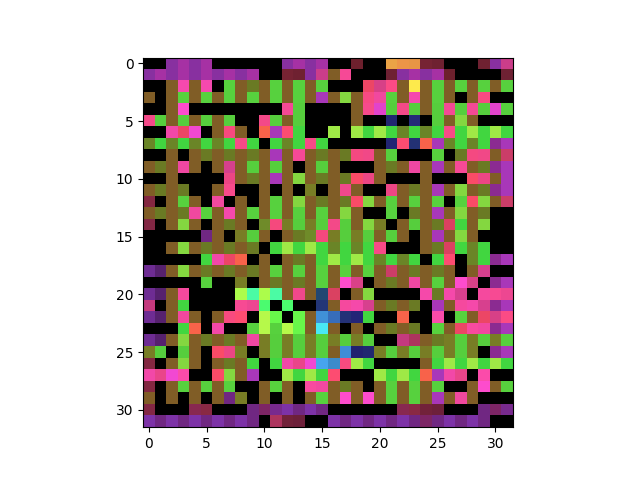

In [203]:
pixCol.drawPlot()

### View Distribution in NDSP

<div>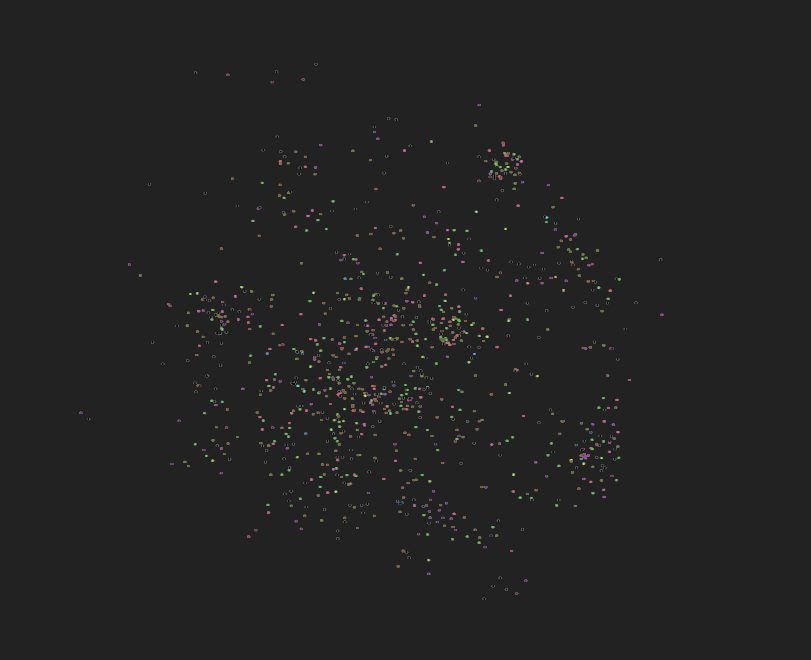</div>
My first look at the clustering in 64-d. It looks very chaotic.


<div>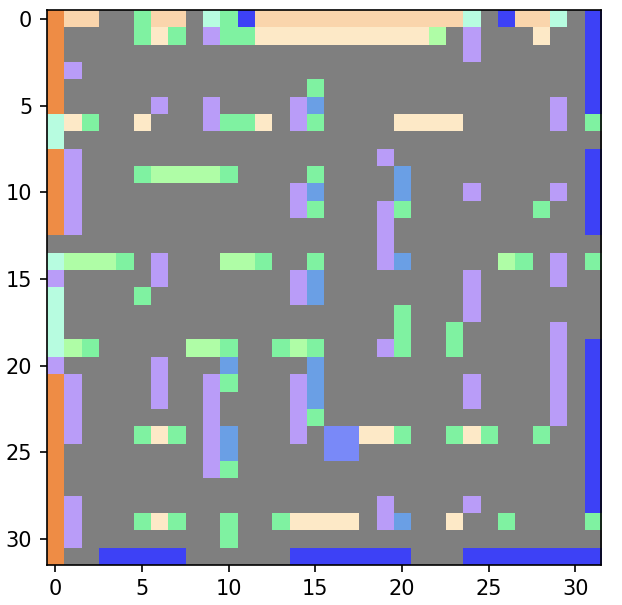</div>
Here is the result of my manual clustering. It looks promising in terms of interpreting
the maze structure, but most exciting is to see the mouse clearly selected.


<div>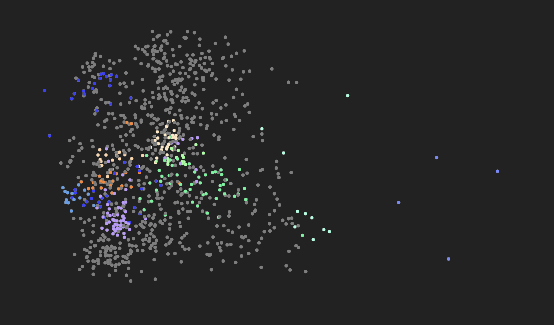</div>
The mouse, like in block1.conv, is a very spread out constelation of points, far from one another and the rest of the clusters.



## block1.res1.relu1

In [206]:
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.relu1        - block1.res1.relu1._1af_1024dp_64dim_.bin

filename = "block1.res1.relu1._1af_1024dp_64dim_.bin"
num_channels = 64
pix_dim = 32

In [207]:
activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((num_channels, pix_dim, pix_dim))
            .transpose((2,0,1))
            )

### Clustering

#### Hierarchal Linking

In [208]:
pixels = activ_img.reshape((num_channels,-1))

In [209]:
pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    )

In [210]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

(-0.02, 0.4)

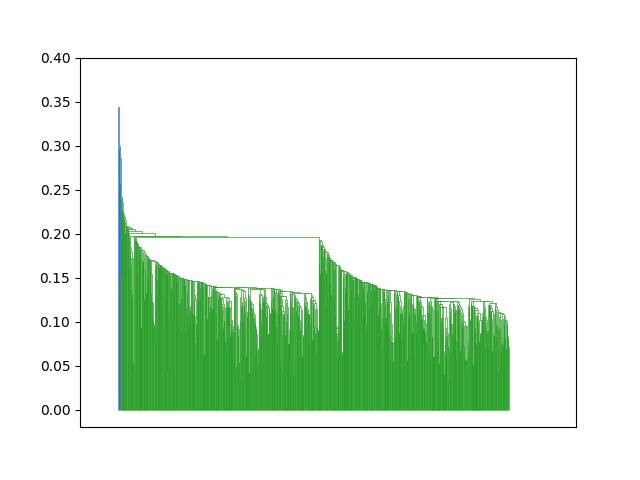

In [211]:
fig, ax = plt.subplots()
acf = ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=ax,
           )

ax.set_xlim([-1000,12000])
ax.set_ylim([-0.02,0.4])

#### Classify by Hierarchy

In [212]:
classif = hierarchy.fcluster(
    pix_link,
    0.17,
    criterion='distance',
    depth=2,
    )

In [213]:
classif.min(), classif.max()

(1, 88)

### Interactive Pixel Cluster Labeling

In [214]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)
pixCol = InteractivePixCol(  classif.reshape((pix_dim,pix_dim))  )

In [219]:
# This needed more clusters, but it is interesting this strong stripe pattern.
# I think it is an artifact of the max pool more than anything the algorithm is
# trying to do.
pixCol.loadClassif(
[[[92, 33, 113], [0, 0, 0], [109, 32, 82], [112, 33, 78], [0, 0, 0], [133, 50, 167], [0, 0, 0], [90, 34, 116], [100, 32, 108], [102, 32, 108], [110, 33, 52], [161, 48, 159], [0, 0, 0], [0, 0, 0], [100, 31, 104], [0, 0, 0], [109, 33, 110], [0, 0, 0], [112, 33, 103], [0, 0, 0], [33, 112, 110], [49, 40, 134], [0, 0, 0], [33, 111, 111], [32, 109, 101], [34, 115, 113], [0, 0, 0], [33, 107, 112], [113, 34, 113], [0, 0, 0], [0, 0, 0], [35, 116, 116], [34, 110, 114], [0, 0, 0], [103, 31, 106], [239, 71, 216], [0, 0, 0], [32, 104, 109], [143, 43, 90], [240, 72, 198], [226, 71, 239], [223, 67, 210], [119, 35, 65], [156, 49, 165], [237, 71, 156], [243, 253, 75], [34, 115, 115], [0, 0, 0], [33, 107, 112], [33, 102, 111], [0, 0, 0], [32, 109, 95], [0, 0, 0], [102, 32, 108], [97, 33, 113], [32, 106, 109], [32, 103, 108], [0, 0, 0], [97, 32, 108], [33, 110, 110], [97, 32, 108], [106, 31, 106], [0, 0, 0], [33, 112, 108], [32, 109, 106], [111, 33, 112], [35, 114, 118], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [32, 107, 106], [32, 105, 109], [107, 33, 113], [0, 0, 0], [0, 0, 0], [33, 110, 108], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], ["_1", "_2", "_3", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "_31", "_32", "_33", "_34", "_35", "_36", "_37", "_38", "_39", "_40", "_41", "_42", "_43", "_44", "_45", "_46", "_47", "_48", "_49", "_50", "_51", "_52", "_53", "_54", "_55", "_56", "_57", "_58", "_59", "_60", "_61", "_62", "_63", "_64", "_65", "_66", "_67", "_68", "_69", "_70", "_71", "_72", "_73", "_74", "_75", "_76", "_77", "_78", "_79", "_80", "_81", "_82", "_83", "_84", "_85", "_86", "_87", "_88"], [21, 73, 21, 45, 21, 45, 21, 45, 28, 54, 16, 60, 21, 45, 21, 45, 21, 58, 21, 34, 14, 61, 21, 53, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 15, 1, 17, 38, 21, 45, 21, 45, 21, 34, 14, 2, 3, 38, 21, 0, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 11, 65, 21, 9, 21, 45, 21, 46, 21, 45, 21, 59, 21, 45, 21, 45, 31, 45, 23, 51, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 64, 32, 55, 21, 45, 21, 45, 21, 45, 11, 45, 21, 0, 21, 45, 21, 45, 21, 40, 21, 66, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 71, 63, 76, 35, 24, 40, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 8, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 44, 21, 45, 21, 45, 21, 45, 21, 45, 21, 56, 72, 35, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 8, 21, 45, 21, 45, 20, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 48, 21, 45, 21, 45, 20, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 6, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 67, 45, 21, 75, 21, 45, 21, 45, 21, 45, 21, 49, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 78, 79, 77, 80, 21, 62, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 10, 45, 21, 5, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 83, 81, 85, 87, 69, 86, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 7, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 44, 29, 70, 68, 84, 22, 82, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 39, 21, 45, 21, 45, 21, 45, 21, 45, 21, 39, 21, 45, 21, 7, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 41, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 7, 21, 45, 21, 36, 21, 40, 21, 45, 21, 45, 27, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 50, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 37, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 7, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 6, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 40, 21, 45, 25, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 30, 40, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 4, 45, 21, 6, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 52, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 57, 21, 47, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 74, 45, 21, 5, 19, 43, 18, 42, 26, 41, 21, 45, 21, 45, 21, 45, 21, 45, 12, 45, 13, 43, 18, 42, 18, 42, 18, 45, 33, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 12, 45, 18, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 21, 45, 10, 45]]
)

In [220]:
#pixCol.printClassif()

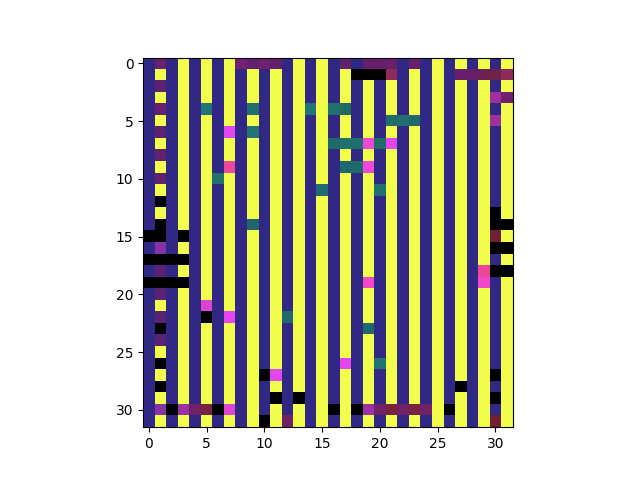

In [221]:
pixCol.drawPlot()

### View Distribution in NDSP

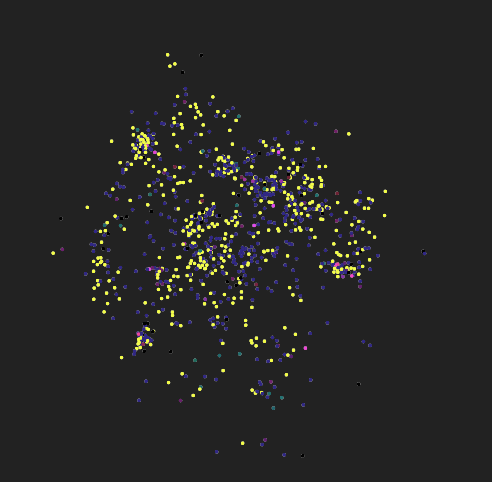

The lazy stripy clustering when first imported, from PCA view. I looked at it and tried separating the two main clusters but they do seem to be intermeshed with one another.

## block1.res1.conv1

In [222]:
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.conv1        - block1.res1.conv1._1af_1024dp_64dim_.bin

filename = "block1.res1.conv1._1af_1024dp_64dim_.bin"
num_channels = 64
pix_dim = 32

In [223]:
activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((num_channels, pix_dim, pix_dim))
            .transpose((2,0,1))
            )

### Clustering

#### Hierarchal Linking

In [224]:
pixels = activ_img.reshape((num_channels,-1))

In [225]:
pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    )

In [226]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

(-0.02, 0.8)

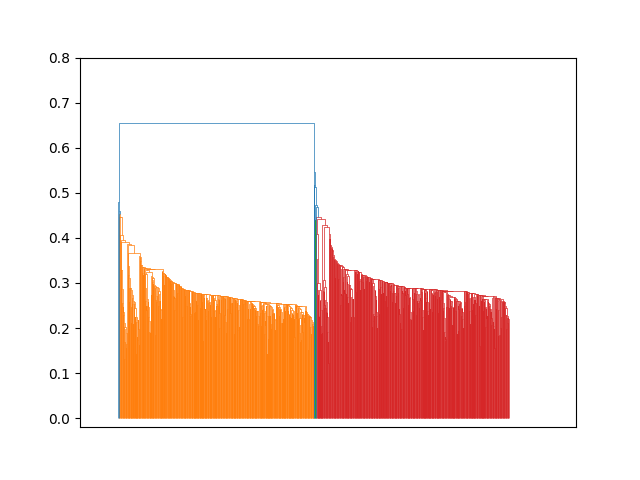

In [229]:
fig, ax = plt.subplots()
acf = ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=ax,
           )

ax.set_xlim([-1000,12000])
ax.set_ylim([-0.02,0.8])

#### Classify by Hierarchy

In [230]:
classif = hierarchy.fcluster(
    pix_link,
    0.35,
    criterion='distance',
    depth=2,
    )

In [231]:
classif.min(), classif.max()

(1, 44)

### Interactive Pixel Cluster Labeling

In [232]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)
pixCol = InteractivePixCol(  classif.reshape((pix_dim,pix_dim))  )

In [236]:
# The linkage clustering didn't seem very promising.
# I could maybe try k-means or some other cluster method...
# But this is a nice opportunity to try NDSP clustering from scratch again.

# It seems once again this makes the placement of the mouse very obvious,
# but it does not show the cheese or structure of the maze on the first go.

pixCol.loadClassif([
[[127,127,127],[112,248,227],[238,133,80],[187,250,196],[246,117,188],[245,124,247],[167,234,123]], ["unclassed","class2","class3","class4","class5","class6","class7"], [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,6,6,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,6,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
])

In [233]:
#pixCol.printClassif()

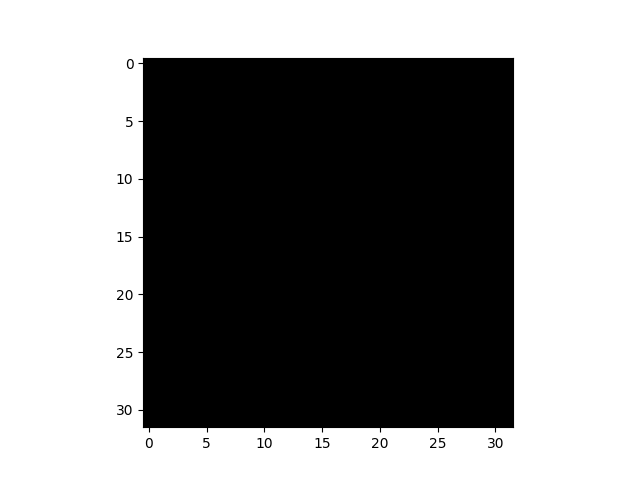

In [234]:
pixCol.drawPlot()

### View Distribution in NDSP

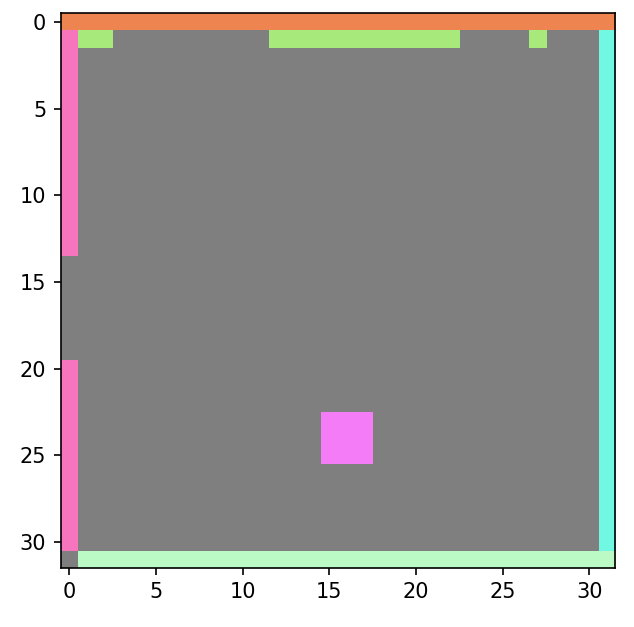

Mouse position again is clearly distinct from the rest of the clusters.

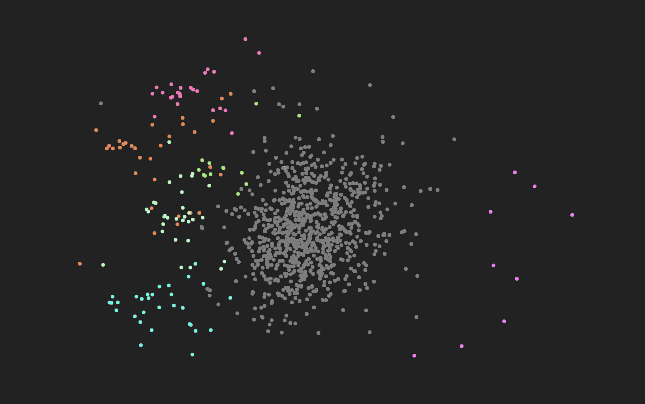

Here the purple cluster on the right is the mouse.

## block2.res1.resadd

In [239]:
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.resadd       - block2.res1.resadd._1af_256dp_128dim_.bin

filename = "block2.res1.resadd._1af_256dp_128dim_.bin"
num_channels = 128
pix_dim = 16

In [240]:
activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((num_channels, pix_dim, pix_dim))
            .transpose((2,0,1))
            )

### Clustering

#### Hierarchal Linking

In [242]:
pixels = activ_img.reshape((num_channels,-1))

In [243]:
pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    )

In [244]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

(-0.02, 3.0)

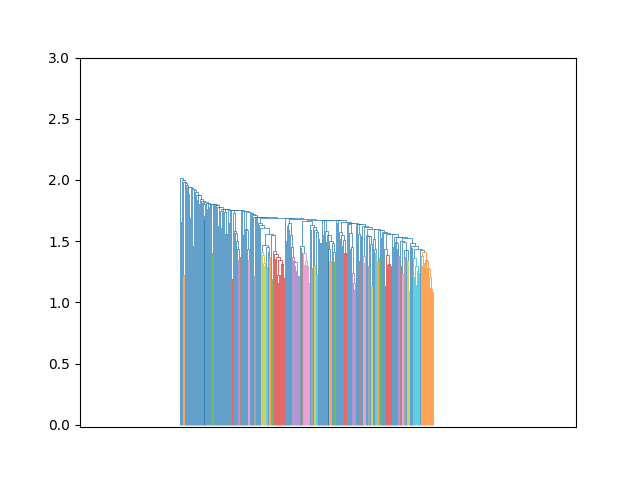

In [249]:
fig, ax = plt.subplots()
acf = ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=ax,
           )

ax.set_xlim([-1000,4000])
ax.set_ylim([-0.02,3])

#### Classify by Hierarchy

In [255]:
classif = hierarchy.fcluster(
    pix_link,
    1.5,
    criterion='distance',
    depth=2,
    )

In [256]:
classif.min(), classif.max()

(1, 134)

### Interactive Pixel Cluster Labeling

In [257]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)
pixCol = InteractivePixCol(  classif.reshape((pix_dim,pix_dim))  )

In [264]:
pixCol.loadClassif([
[[127,127,127],[245,192,234],[238,119,134],[154,128,236],[239,131,195],[228,166,252],[204,234,112],[233,181,247],[215,140,244],[118,169,232],[199,235,246],[231,79,134],[174,243,246],[76,185,229],[234,152,97],[240,106,85],[234,89,100],[252,200,149],[236,135,147],[84,231,155],[233,252,204],[170,244,182],[98,156,235]], ["unclassed","class2","class3","class4","class5","class6","class7","class8","class9","class10","class11","class12","class13","class14","class15","class16","class17","class18","class19","class20","class21","class22","class23"], [20,19,0,19,19,19,19,19,19,19,19,19,19,3,19,3,13,14,14,17,20,15,15,15,15,15,17,17,9,9,20,3,12,9,9,9,2,9,9,9,17,9,9,9,18,16,9,8,16,16,2,2,2,2,2,2,11,8,2,2,10,11,4,8,22,22,2,6,11,4,6,6,11,8,2,6,14,11,5,8,13,22,6,6,4,14,6,6,11,21,6,19,20,18,2,8,12,9,17,6,5,5,9,15,5,5,15,15,15,15,0,19,18,16,11,9,9,9,9,9,5,5,9,9,9,17,14,10,17,20,20,16,5,8,2,18,8,9,9,2,2,2,8,10,16,16,21,21,9,8,6,1,3,2,2,2,2,14,8,2,18,16,11,8,8,2,1,1,1,2,4,6,6,16,8,2,14,22,16,8,8,6,1,1,1,15,5,6,4,0,14,4,13,22,0,16,8,7,1,1,1,1,1,5,5,6,6,3,12,18,6,14,3,6,1,1,1,1,1,5,9,5,5,3,12,8,14,14,3,10,6,1,1,6,14,8,8,11,5,8,8,8,9,9,8,8,10,18,21,10,9,8,18,11,8,8]
])

In [263]:
## coloring the linkage clustering. It's weird:
#pixCol.loadClassif(
#[[[0, 0, 0], [0, 0, 0], [157, 47, 150], [0, 0, 0], [0, 0, 0], [0, 0, 0], [146, 49, 166], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [134, 45, 150], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [130, 47, 157], [132, 80, 39], [0, 0, 0], [0, 0, 0], [155, 46, 150], [0, 0, 0], [0, 0, 0], [131, 59, 39], [0, 0, 0], [0, 0, 0], [164, 49, 146], [116, 71, 34], [146, 47, 158], [124, 77, 37], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [121, 76, 36], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [122, 80, 36], [148, 44, 71], [127, 75, 38], [140, 48, 163], [160, 48, 69], [121, 36, 86], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [103, 35, 118], [121, 81, 36], [133, 90, 40], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [119, 100, 35], [139, 41, 87], [0, 0, 0], [0, 0, 0], [0, 0, 0], [130, 54, 39], [0, 0, 0], [0, 0, 0], [152, 45, 70], [0, 0, 0], [0, 0, 0], [0, 0, 0], [136, 45, 40], [141, 45, 152], [124, 47, 37], [0, 0, 0], [0, 0, 0], [125, 82, 37], [0, 0, 0], [144, 43, 62], [161, 48, 82], [0, 0, 0], [0, 0, 0], [121, 76, 36], [168, 50, 105], [124, 100, 37], [118, 74, 35], [151, 45, 57], [129, 77, 38], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], ["_1", "_2", "_3", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "_31", "_32", "_33", "_34", "_35", "_36", "_37", "_38", "_39", "_40", "_41", "_42", "_43", "_44", "_45", "_46", "_47", "_48", "_49", "_50", "_51", "_52", "_53", "_54", "_55", "_56", "_57", "_58", "_59", "_60", "_61", "_62", "_63", "_64", "_65", "_66", "_67", "_68", "_69", "_70", "_71", "_72", "_73", "_74", "_75", "_76", "_77", "_78", "_79", "_80", "_81", "_82", "_83", "_84", "_85", "_86", "_87", "_88", "_89", "_90", "_91", "_92", "_93", "_94", "_95", "_96", "_97", "_98", "_99", "_100", "_101", "_102", "_103", "_104", "_105", "_106", "_107", "_108", "_109", "_110", "_111", "_112", "_113", "_114", "_115", "_116", "_117", "_118", "_119", "_120", "_121", "_122", "_123", "_124", "_125", "_126", "_127", "_128", "_129", "_130", "_131", "_132", "_133", "_134"], [99, 78, 45, 101, 56, 96, 99, 51, 99, 78, 45, 101, 56, 96, 99, 51, 102, 78, 45, 101, 56, 96, 99, 51, 93, 79, 45, 101, 56, 96, 99, 51, 93, 29, 45, 100, 56, 92, 99, 51, 122, 28, 45, 94, 109, 37, 107, 53, 21, 0, 111, 9, 112, 18, 13, 54, 22, 131, 128, 108, 133, 16, 14, 117, 118, 5, 125, 49, 7, 119, 15, 106, 35, 3, 46, 50, 8, 69, 97, 89, 33, 4, 43, 98, 63, 68, 97, 88, 33, 77, 43, 98, 60, 68, 99, 87, 33, 73, 43, 98, 60, 68, 99, 87, 33, 73, 43, 98, 62, 68, 99, 87, 34, 73, 43, 98, 61, 66, 99, 86, 32, 20, 44, 42, 59, 36, 2, 6, 99, 78, 45, 101, 56, 96, 99, 51, 99, 78, 45, 101, 56, 96, 99, 51, 82, 78, 45, 101, 56, 96, 99, 51, 81, 80, 45, 101, 56, 96, 99, 51, 81, 26, 45, 100, 56, 92, 99, 52, 25, 27, 45, 95, 110, 38, 104, 55, 23, 1, 47, 10, 113, 19, 11, 121, 24, 129, 115, 120, 130, 17, 12, 124, 30, 127, 114, 71, 126, 116, 132, 105, 31, 64, 48, 72, 123, 70, 99, 83, 41, 65, 43, 90, 58, 67, 99, 84, 39, 74, 43, 90, 57, 67, 99, 85, 39, 74, 43, 90, 57, 67, 99, 85, 39, 75, 43, 91, 61, 67, 99, 85, 40, 76, 43, 103, 61, 66, 99, 86, 32, 20, 44, 42, 59, 36, 2, 6]]
#)

In [261]:
#pixCol.printClassif()

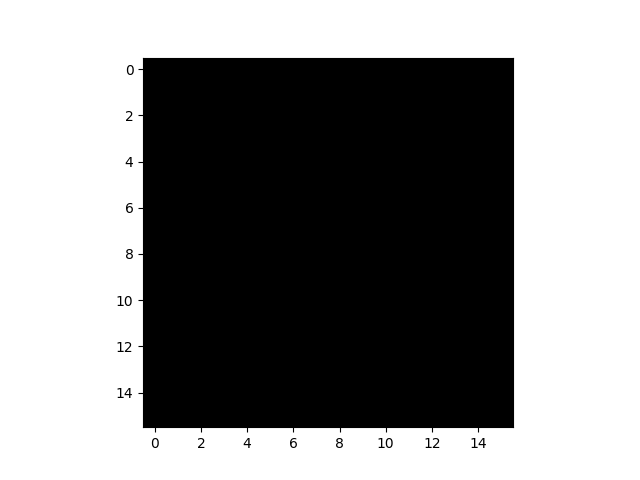

In [259]:
pixCol.drawPlot()

### View Distribution in NDSP

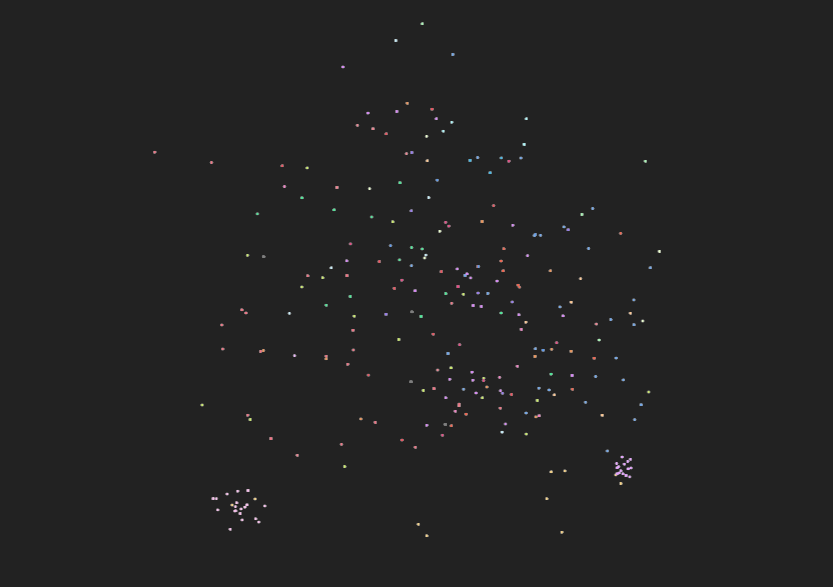

It appears to be possible to rotate such that both the mouse (bottom left) and cheese (bottom right) can be seen as almost single points.




In [ ]:
# The mouse vector is:
# [-0.3279387557080814,-0.16344460809514635,-0.12256191706373579,-0.06899608547488849,0.02615895579081206,-0.27230727007346495,-0.16926067251534688,-0.025742965972139722,-0.06980496627234277,-0.2681389255892663,-0.017648412269495782,-0.20987158091295333,-0.17741203201668604,-0.24342022035714417,-0.10776620509014243,-0.165393733552524,-0.21508895162315594,-0.09605959776256766,0.0028158334039506457,0.10604492956328959,-0.24669527989767848,0.07985336564126469,0.17109848842734382,0.08119916343795401,-0.09389693609305791,-0.10095553153327533,-0.1916333263119062,-0.046937802185614906,-0.2171316377463795,-0.02733146452478,-0.17171790619336424,-0.00577449266399656,-0.1308221658248277,-0.08762087517728408,-0.22390239863168626,-0.21227383675674596,0.1646034667889277,-0.00008987972424143837,-0.025678232001761597,-0.08049738265219189,-0.088421364625295,-0.119503120581309,-0.12709211770977294,0.13845033234074003,0.0762636446881862,-0.1335223445757514,-0.0984860041311809,-0.03433956028450103,-0.08226773568562099,0.04253490801368441,-0.06698708564397834,-0.28946936272439505,-0.11212026114974703,-0.15795626118779182,-0.05537374778872445,-0.10038232599340734,-0.14263382953192508,-0.1476848909542674,-0.04684270501491569,0.06755098913397108,-0.17454603332139196,-0.029139767800058638,-0.1859625153066147,-0.2593166847668943,-0.028384516813925335,-0.08231961292525132,-0.19351753273180552,-0.040847549658446086,-0.02842367546898978,-0.14260332605668477,-0.09987920061463401,-0.02772895743449529,-0.2357647507673218,-0.10111453845387414,-0.037013624218248185,-0.008859741191069284,0.20270836477478346,-0.14467167357603708,-0.09971835100579829,-0.061752834845156895,0.012543183352266039,0.027920806869154886,-0.06193777972034046,-0.07637590187646094,-0.07299497759058363,-0.3148323641646476,-0.14517602430922644,-0.05673882489403089,-0.09734513983130455,-0.15503479061382158,-0.17259526625275612,-0.06402735154898394,-0.02650933229320106,-0.022658900490828922,0.09014377281779334,0.044827746138686224,0.022726500883609765,-0.08331529689686638,-0.18685138314252808,-0.0577471089505014,-0.11679756073724656,-0.03717652850207828,-0.2661447035414832,-0.13042489155417397,-0.05151803277078129,-0.053620991962296624,-0.0057705238993678775,-0.24587825082597278,-0.07725414349919274,-0.11459624802782423,0.1771436052042104,-0.2798569234354155,-0.06569912116087619,-0.22242771106816472,-0.13454544331346238,-0.1649553289725667,-0.12289059392753102,-0.23976144478434608,-0.1373815300563971,-0.19496729047525496,-0.12966045524392808,-0.013953337534552529,-0.020223638841084073,-0.19225364746082396,-0.14269665202924184,-0.08393253252974578,-0.15770478333745683,-0.23980694406089328]
# The cheese vector is:
# [0.020133494454271653,-0.09359531345612862,-0.14133276176803253,-0.22013476315666647,-0.11283255171249895,-0.20067007752025828,-0.001991547425003613,-0.15228643421741092,-0.04727172128417913,-0.28782665554214926,0.12223854088498388,0.09873498735182426,-0.2612506190643591,-0.15047058961628115,-0.0725518079365001,-0.21686439873541102,-0.09550287004779368,-0.08124114222386304,-0.15679858898853555,-0.06670290341272074,-0.1066783322569202,-0.00048752183861592235,0.06081882623188636,-0.1901640223667902,0.20410248620764299,-0.10289096196784693,0.2225867395891863,-0.14730005273047617,-0.07600600899690214,-0.011144618996802498,-0.15716049776357763,-0.039563484928187204,-0.13061376332360156,-0.04409421651678927,-0.1558742128750857,0.04906893510590581,-0.2067375912824098,-0.05515299534753842,-0.11780477446668289,-0.029891091891947913,-0.0555831044090583,-0.19436699634089188,-0.12085903457858983,-0.09666311445043367,0.024920409216600305,-0.22868765759117463,-0.1172249865005998,0.06637829279198366,-0.21477906192269394,-0.11696940463255434,-0.1944092005929526,-0.34067677312037525,-0.1616563180132824,0.023462436435853735,-0.01382952687494895,-0.09591694693902836,-0.15077563791590579,-0.1746252190102549,0.06696300252395518,0.01812693410936524,-0.17572280589271994,-0.0932763790821328,-0.196008080507026,-0.06094519607722759,-0.07381376958287814,0.053943610257085634,-0.2327677320469828,-0.13451041916713996,-0.2004210429594797,-0.0850534138872343,-0.2577559167847914,-0.15577402864308917,-0.22322892003199635,-0.12151226587593555,-0.17261751675430467,-0.06818531048210229,0.044544521938352025,-0.1255997925558511,-0.1844916326158187,-0.12482400348081309,-0.06220972626675468,-0.1636038893724189,0.04234804191133555,-0.054308386738686,-0.10008037419003599,-0.22703055752550855,-0.1962415762245655,-0.022237060810713208,-0.07734622395433047,-0.18091472676571677,-0.13106693020638296,-0.1602665826897411,-0.10940718700123184,-0.21561843989526525,0.11881558213602095,-0.17852936860393076,-0.17656242540654013,-0.18905118195449605,-0.11705810565720587,-0.10332342631676618,-0.02431593630599844,-0.12012259136228,-0.04063031148603734,-0.09890578785801635,-0.12040640786290169,-0.07520687037750202,-0.05403127477449529,-0.218135335647008,-0.15444676446564057,-0.09504929710836972,-0.04898556288989151,-0.16200376981321504,-0.4184473858160131,0.03725468049592832,-0.07126658678273945,-0.13145214604104266,-0.08764293165329624,-0.07198434640817783,-0.16291794268523946,-0.052356215741704494,-0.11693532962132902,-0.14044846583376913,-0.1704010650077287,0.017167172969921547,-0.08479444857905893,-0.1419211277628646,-0.17260165381080964,-0.11241121951709776]

# js for getting vecs:
# cheese_vec = se1.currentData.filter((x,i)=>se1.isPointSelected[i])
# JSON.stringify(math.mean(cheese_vec,0)) 

## LAYER_NAME

In [205]:

filename = "FILENAME"
num_channels = NUM_CHANNEL
pix_dim = PIX_DIMENSION

SyntaxError: invalid syntax (58398647.py, line 1)

In [ ]:
activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((num_channels, pix_dim, pix_dim))
            .transpose((2,0,1))
            )

### Clustering

#### Hierarchal Linking

In [ ]:
pixels = activ_img.reshape((num_channels,-1))

In [ ]:
pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    )

In [ ]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

In [ ]:
fig, ax = plt.subplots()
acf = ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=ax,
           )

ax.set_xlim([-1000,12000])
ax.set_ylim([-0.02,0.4])

#### Classify by Hierarchy

In [ ]:
classif = hierarchy.fcluster(
    pix_link,
    0.18,
    criterion='distance',
    depth=2,
    )

In [ ]:
classif.min(), classif.max()

### Interactive Pixel Cluster Labeling

In [ ]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)
pixCol = InteractivePixCol(  classif.reshape((pix_dim,pix_dim))  )

In [ ]:
#pixCol.printClassif()

In [ ]:
pixCol.drawPlot()

### View Distribution in NDSP